Author: Carlos Roberto de Melo

Date: 04/16/2020

Obj: Manipulate images. Subtract, add, divide etc ...


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from mpdaf.obj import Image, WCS
import astropy.units as u
from mpdaf.obj import deg2sexa, sexa2deg

In [2]:
f814w = Image('/home/carlos/Desktop/ESO325_HST_DataReduction/Cuts/F814W_centerized.fits') #Open File
f814w.info() #Display informations

[INFO] 1025 x 1025 Image (/home/carlos/Desktop/ESO325_HST_DataReduction/Cuts/F814W_centerized.fits)
[INFO] .data(1025 x 1025) (no unit), no noise
[INFO] center:(-38:10:33.4395,13:43:33.2224) size:(41.000",41.000") step:(0.040",0.040") rot:-0.0 deg frame:FK5


In [3]:
f475w = Image('/home/carlos/Desktop/ESO325_HST_DataReduction/Cuts/F475W_centerized.fits')
f475w.info()

[INFO] 1025 x 1025 Image (/home/carlos/Desktop/ESO325_HST_DataReduction/Cuts/F475W_centerized.fits)
[INFO] .data(1025 x 1025) (no unit), no noise
[INFO] center:(-38:10:33.4395,13:43:33.2224) size:(41.000",41.000") step:(0.040",0.040") rot:0.0 deg frame:FK5


In [4]:
#header of each image 
ExpTime_f814w = 18882.0 #Exposure time in seconds
ExpTime_f475w = 3501.0  #Exposure time in seconds

In [6]:
#For normalize each image by its exposure time
f475w_time = f475w/ExpTime_f475w
f814w_time = f814w/ExpTime_f814w

In [9]:
folder_save = '/home/carlos/Desktop/ESO325_HST_DataReduction/Cuts/' #Path for the save folder
f475w_time.write(folder_save + 'F475w_TimeScaled.fits') #Save the norlized images
f814w_time.write(folder_save + 'F814w_TimeScaled.fits')

[INFO] 1025 x 1025 Image (/home/carlos/Desktop/ESO325_HST_DataReduction/Cuts/F475w_TimeScaled.fits)
[INFO] .data(1025 x 1025) (no unit), no noise
[INFO] center:(-38:10:33.4395,13:43:33.2224) size:(41.000",41.000") step:(0.040",0.040") rot:0.0 deg frame:FK5


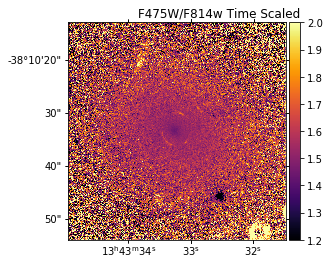

In [8]:
#For compute the ratio of two images.
    #Here, we assume that the images are already registered
F475w_divided_F814w = f475w_time/f814w_time #Take the ratio
F475w_divided_F814w.info() #Display the informations
F475w_divided_F814w.plot(vmin=1.2, vmax=2,colorbar='v',cmap='inferno',use_wcs=True) #Display the result
plt.title('F475W/F814w Time Scaled',loc='right') #Title for the image
plt.savefig('/home/carlos/Desktop/ESO325_HST_DataReduction/Images/F475_divided_F814_TimeScaled.png',fmt='png',dpi=1200) #Save Image
F475w_divided_F814w.write('/home/carlos/Desktop/ESO325_HST_DataReduction/Cuts/F475_divided_F814_TimeScaled.fits') #Save fits file with ratio image

#.plot
    #vmin/vmax: minimum/maximum value of colorbar
    #colorbar: 'v' add colorbor; 'f' remove colorbar
    #cmap: colours for the map
    #use_wcs: plot with WCS coordinates. If False, display in px coordinates   

##################################################################

From here, we assume that the radial profile is already ready

##################################################################


In [21]:
    #Open the F475W/F814W, centralized, time scale and radial average
radial_filter = Image('/home/carlos/Desktop/Teste/Cuts/F475w_divided_F814w_circular.fits')
radial_filter.info()
radial_filter.plot(vmin=0.1, vmax=0.3,colorbar='v',cmap='inferno',use_wcs=True)  

OSError: Invalid file: /home/carlos/Desktop/Teste/Cuts/F475w_divided_F814w_circular.fits

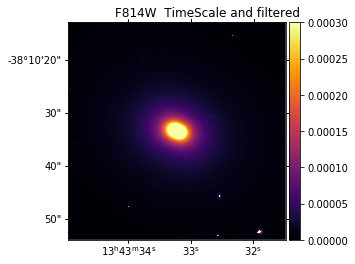

In [16]:
#Now we aply the radial_filter above in the F814W image time scaled
f814w_filtered = f814w_time*radial_filter
f814w_filtered.plot(vmin=0,vmax=3e-4, use_wcs=True, colorbar='v', cmap='inferno')
plt.title('F814W  TimeScale and filtered',loc='right')
plt.savefig('/home/carlos/Desktop/ESO325_HST_DataReduction/Images/F814W_timeScale_filtered.png',fmt='png',dpi=1200)
f814w_filtered.write('/home/carlos/Desktop/ESO325_HST_DataReduction/Cuts/F814W_timeScale_filtered.fits')

In [17]:
#Now we get the gravitational arcs
arcs = f475w_time - f814w_filtered
arcs.write('/home/carlos/Desktop/ESO325_HST_DataReduction/Cuts/Arcs.fits')

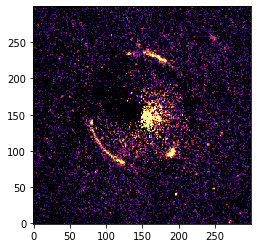

In [19]:
arcs_cut = arcs.subimage(center=(512,512),unit_center=None,size=12.,unit_size=u.arcsec)
arcs_cut.plot(vmin=0,vmax=1e-5,cmap='inferno')
plt.savefig('arcs.png',fmt='png',dpi=1200)